In [192]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, auc
import matplotlib.pyplot as plt 
import seaborn as sns

In [193]:
white_df = pd.read_csv('resources/whitewines.csv',sep=',')
white_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [194]:
white_df.shape

(4898, 12)

In [195]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [196]:
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [197]:
white_df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

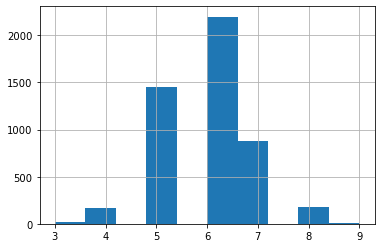

In [198]:
white_df.quality.hist()

In [199]:
# bins = (2, 6.5, 8)
# group_names = [0,1] # poor quality = 0, good quality = 1
# white_df['quality_bin'] = pd.cut(white_df['quality'], bins = bins, labels = group_names)
# white_df.head(10)

In [200]:
# poor quality = 0, good quality = 1
white_df['quality'] = white_df['quality'].apply(lambda qual: 1 if qual>=6.5 else 0)

In [201]:
white_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,0


In [202]:
white_df.duplicated().sum()

937

In [203]:
X = white_df.drop('quality', axis=1)
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0


In [204]:
y = LabelEncoder().fit_transform(white_df['quality'])
y

array([0, 0, 0, ..., 0, 1, 0])

# Logistic Regression

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [206]:
white_w = LogisticRegression(max_iter=10000, random_state = 42).fit(X_train, y_train)
print(f"Training Data Score: {white_w.score(X_train, y_train)}")
print(f"Testing Data Score: {white_w.score(X_test, y_test)}")

Training Data Score: 0.8135039477266539
Testing Data Score: 0.7844897959183673


In [207]:
target_names = ["good", "poor"]

In [208]:
predictions = white_w.predict(X_test)

y_true = y_test
y_pred = white_w.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        good       0.81      0.95      0.87       941
        poor       0.59      0.24      0.34       284

    accuracy                           0.78      1225
   macro avg       0.70      0.59      0.61      1225
weighted avg       0.75      0.78      0.75      1225



In [209]:
print("Accuracy:",metrics.accuracy_score(y_true, y_pred))
print("Precision:",metrics.precision_score(y_true, y_pred))
print("Sensitivity:",metrics.recall_score(y_true, y_pred))

Accuracy: 0.7844897959183673
Precision: 0.5862068965517241
Sensitivity: 0.23943661971830985


Text(0.5, 257.44, 'Predicted label')

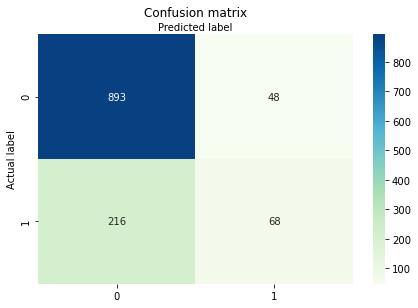

In [210]:
class_names=["good_wine","poor_wine"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="GnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

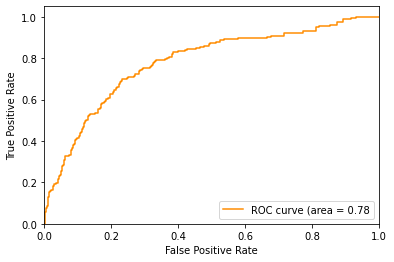

In [211]:
y_pred_proba = white_w.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr, color = 'darkorange',
         label = f'ROC curve (area = {auc:0.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# RandomForestRegression Model

In [212]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, n_estimators=500, max_depth=30).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')
clf

Training Score: 1.0
Testing Score: 0.8938775510204081


RandomForestClassifier(max_depth=30, n_estimators=500, random_state=0)

In [213]:
y_r_pred = clf.predict(X_test)
y_true = y_test
cm_r = confusion_matrix(y_true, y_r_pred)
cm_r

print(classification_report(y_true, y_r_pred, target_names=target_names))
cm_r

              precision    recall  f1-score   support

        good       0.90      0.97      0.93       941
        poor       0.87      0.64      0.74       284

    accuracy                           0.89      1225
   macro avg       0.88      0.81      0.84      1225
weighted avg       0.89      0.89      0.89      1225



array([[913,  28],
       [102, 182]])

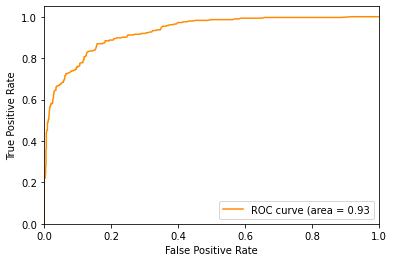

In [214]:
yrfc_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  yrfc_pred_proba)
auc = metrics.roc_auc_score(y_test, yrfc_pred_proba)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr, color = 'darkorange',
         label = f'ROC curve (area = {auc:0.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()